In [2]:
about.

Biocham 4.6.19
Copyright (C) 2003-2020 Inria, EPI Lifeware, Saclay-Île de France, France,
license GNU GPL 2, http://lifeware.inria.fr/biocham4/

# 0. Playing with SEPI

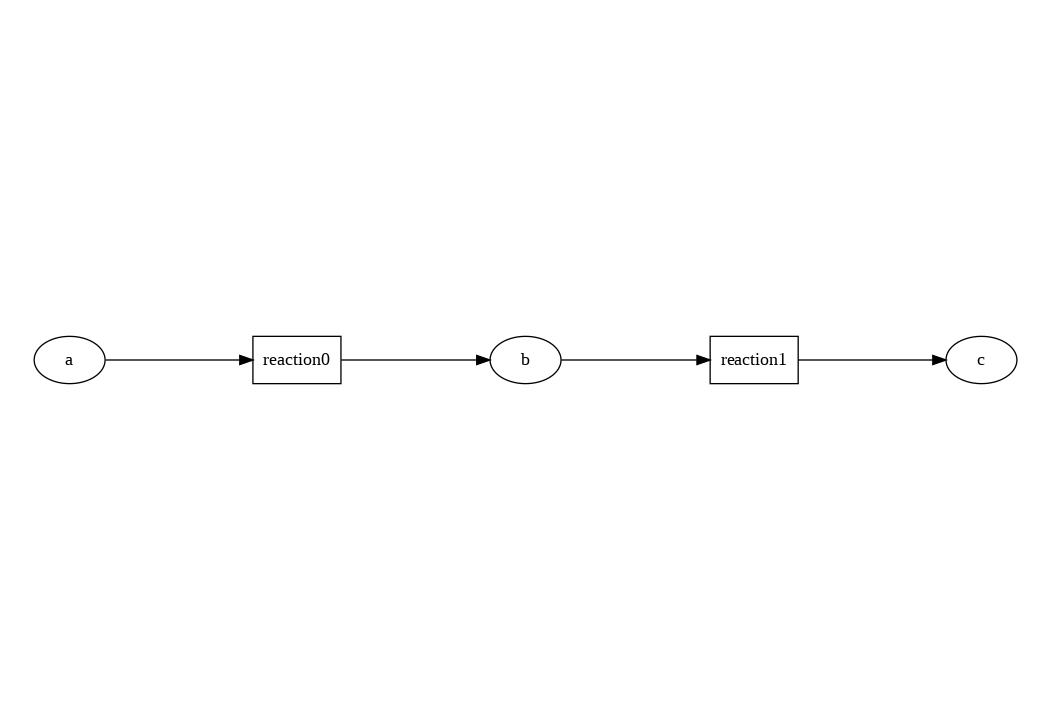

MA(1) for a=>b.
MA(1) for b=>c.

In [3]:
clear_model.
new_model(Basic1).
a => b.
b => c.
export_biocham(Basic1.bc).
list_model.
draw_reactions.

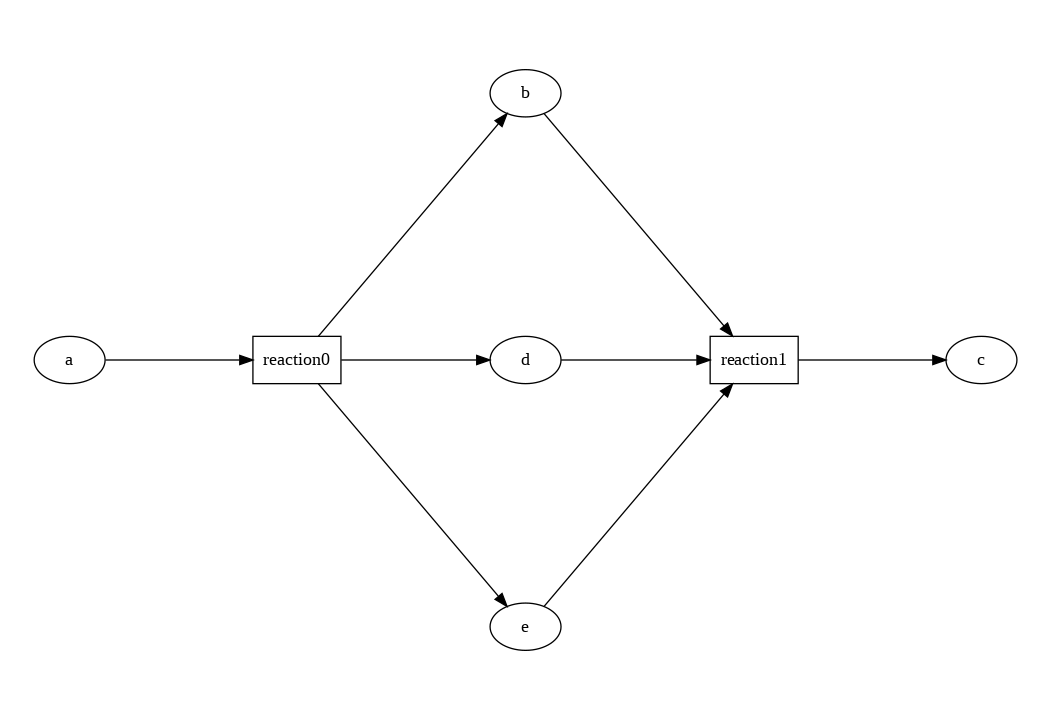

MA(1) for a=>b+d+e.
MA(1) for b+d+e=>c.

In [4]:
new_model(Basic2).
a => b+d+e.
b+d+e => c.
export_biocham(Basic2.bc).
list_model.
draw_reactions.

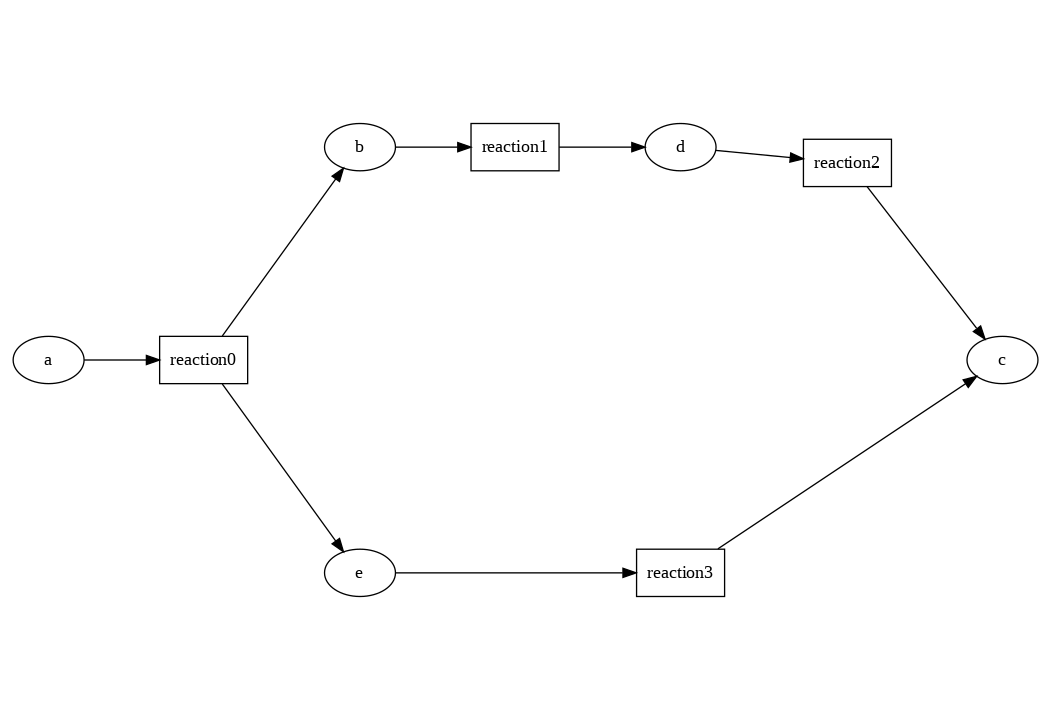

MA(1) for a=>b+e.
MA(1) for b=>d.
MA(1) for d=>c.
MA(1) for e=>c.

In [5]:
new_model(Basic3).
a => b+e.
b => d.
d => c.
e => c.
export_biocham(Basic3.bc).
list_model.
draw_reactions.

How reductions work on these simple examples : with or without merge restriction

In [6]:
search_reduction(Basic2.bc, Basic1.bc, mapping_restriction : [a->a,c->c], merge_restriction : not_species).

sepi
a -> a
b -> deleted
d -> deleted
e -> b
c -> c
{a => b+d+e} -> {a => b}
{b+d+e => c} -> {b => c}
Number of reductions: 1

In [7]:
search_reduction(Basic2.bc, Basic1.bc, mapping_restriction : [a->a,c->c], merge_restriction : not_species, show_support:yes).

sepi
a
e
c
a => b+d+e
b+d+e => c
Number of reductions: 1

In [16]:
search_reduction(Basic2.bc, Basic1.bc, mapping_restriction : [a->a,c->c]).

sepi
a -> a
b -> b
d -> b
e -> b
c -> c
{a => b+d+e} -> {a => b}
{b+d+e => c} -> {b => c}
Number of reductions: 1

In the same way, with different paths to the reaction :

In [17]:
search_reduction(Basic3.bc, Basic1.bc, mapping_restriction : [a->a,c->c], merge_restriction : not_species).

sepi
a -> a
b -> deleted
e -> b
d -> deleted
c -> c
{a => b+e} -> {a => b}
{b => d} -> deleted
{d => c} -> {b => c}
{e => c} -> {b => c}
Number of reductions: 1

In [18]:
search_reduction(Basic3.bc, Basic1.bc, mapping_restriction : [a->a,c->c]).

sepi
a -> a
b -> a
e -> b
d -> b
c -> c
{a => b+e} -> deleted
{b => d} -> {a => b}
{d => c} -> {b => c}
{e => c} -> {b => c}
Number of reductions: 1

We can also extract every sepi reduction :

In [19]:
search_reduction(Basic2.bc, Basic1.bc, mapping_restriction : [a->a,c->c], merge_restriction : not_species, all_reductions : yes).

sepi
a -> a
b -> deleted
d -> deleted
e -> b
c -> c
{a => b+d+e} -> {a => b}
{b+d+e => c} -> {b => c}
sepi
a -> a
b -> b
d -> deleted
e -> deleted
c -> c
{a => b+d+e} -> {a => b}
{b+d+e => c} -> {b => c}
sepi
a -> a
b -> deleted
d -> b
e -> deleted
c -> c
{a => b+d+e} -> {a => b}
{b+d+e => c} -> {b => c}
no sepi found
Number of reductions: 3

Let's try a more complicated example :

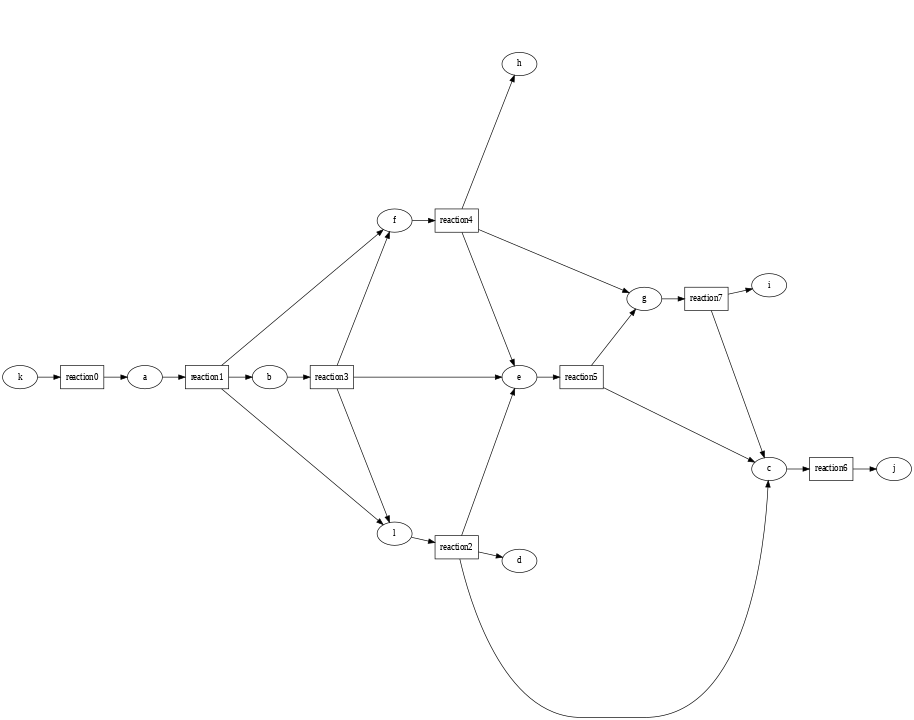

In [9]:
new_model(Basic4).
k => a.
a => b+f+l.
l => d+e+c.
b => l+e+f.
f => h+e+g.
e => g+c.
c => j.
g => i+c.
export_biocham(Basic4.bc).
draw_reactions.

In [10]:
search_reduction(Basic4.bc, Basic1.bc, mapping_restriction : [a->a,c->c], merge_restriction : not_species).

sepi
k -> deleted
a -> a
b -> deleted
f -> deleted
l -> deleted
c -> c
d -> deleted
e -> deleted
g -> b
h -> deleted
j -> deleted
i -> deleted
{k => a} -> deleted
{a => b+f+l} -> {a => b}
{l => c+d+e} -> {b => c}
{b => e+f+l} -> deleted
{f => e+g+h} -> {a => b}
{e => c+g} -> deleted
{c => j} -> deleted
{g => c+i} -> {b => c}
Number of reductions: 1

In [11]:
search_reduction(Basic4.bc, Basic1.bc, mapping_restriction : [a->a,c->c], merge_restriction : not_species,show_support : yes).

sepi
a
c
g
a => b+f+l
l => c+d+e
f => e+g+h
g => c+i
Number of reductions: 1

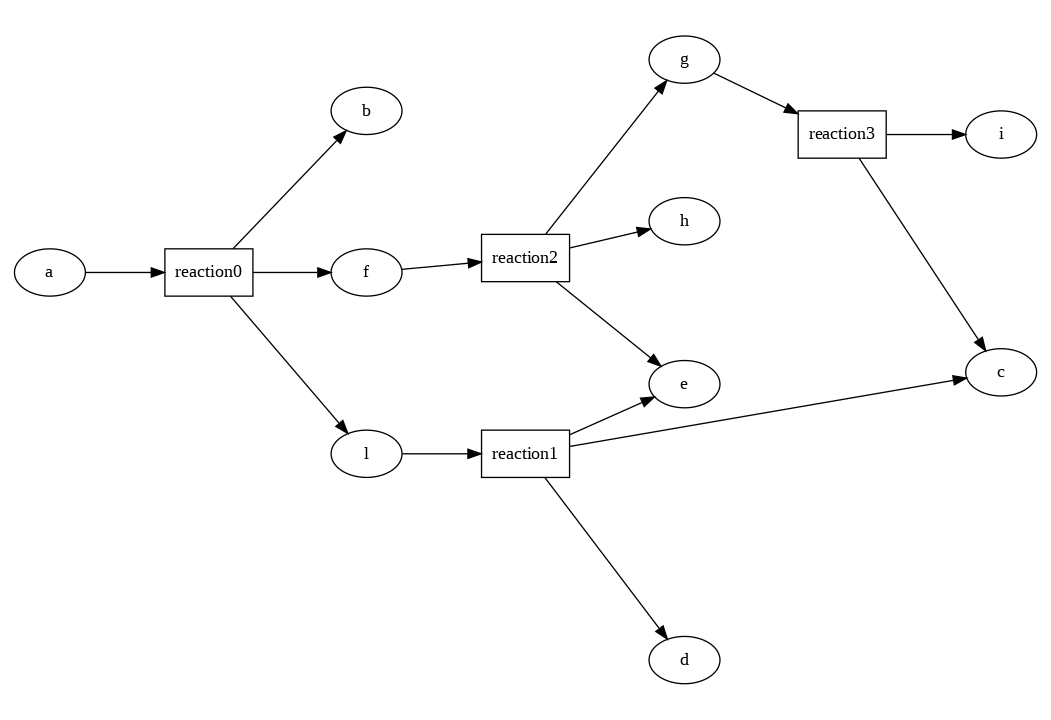

In [12]:
new_model.
a => b+f+l.
l => c+d+e.
f => e+g+h.
g => c+i.
draw_reactions.

In [49]:
search_reduction(Basic4.bc, Basic2.bc, mapping_restriction : [a->a,c->c], merge_restriction : not_species).

no sepi found
Number of reductions: 0

In [50]:
search_reduction(Basic4.bc, Basic3.bc, mapping_restriction : [a->a,c->c], merge_restriction : not_species).

sepi
k -> deleted
a -> a
b -> deleted
f -> b
l -> e
c -> c
d -> deleted
e -> deleted
g -> d
h -> deleted
j -> deleted
i -> deleted
{k => a} -> deleted
{a => b+f+l} -> {a => b+e}
{l => c+d+e} -> {e => c}
{b => e+f+l} -> {a => b+e}
{f => e+g+h} -> {b => d}
{e => c+g} -> deleted
{c => j} -> deleted
{g => c+i} -> {d => c}
Number of reductions: 1

# 1. First CRNs

CRNAlexis is the cCRN developped in Alexis' thesis<br>
CRNVeryShort is one example of aCRN to concretize : acetone + glucose => resorufin <br>
CRNShort is Alexis' CRN but with letters to correspond more to a aCRN <br>
CRNLong is an aCRN on which solutions (as SISO*) can be found in BRENDA

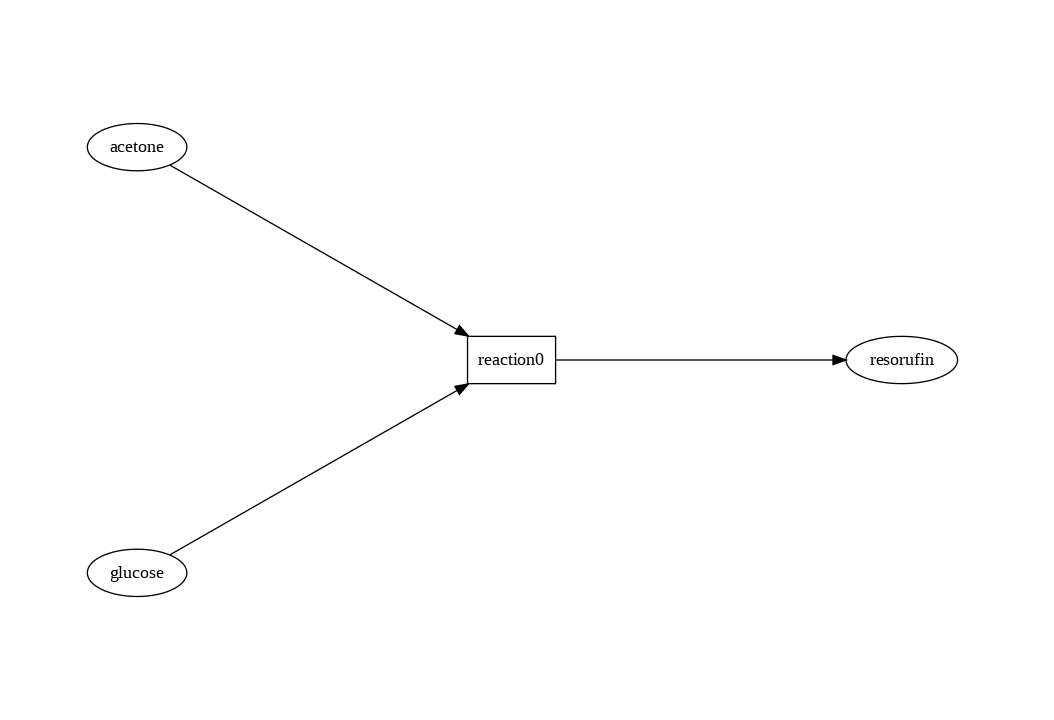

MA(1) for acetone+glucose=>resorufin.

In [13]:
clear_model.
new_model(CRNVeryShort).
acetone+glucose=>resorufin.
export_biocham(CRNVeryShort.bc).
list_model.
draw_reactions.

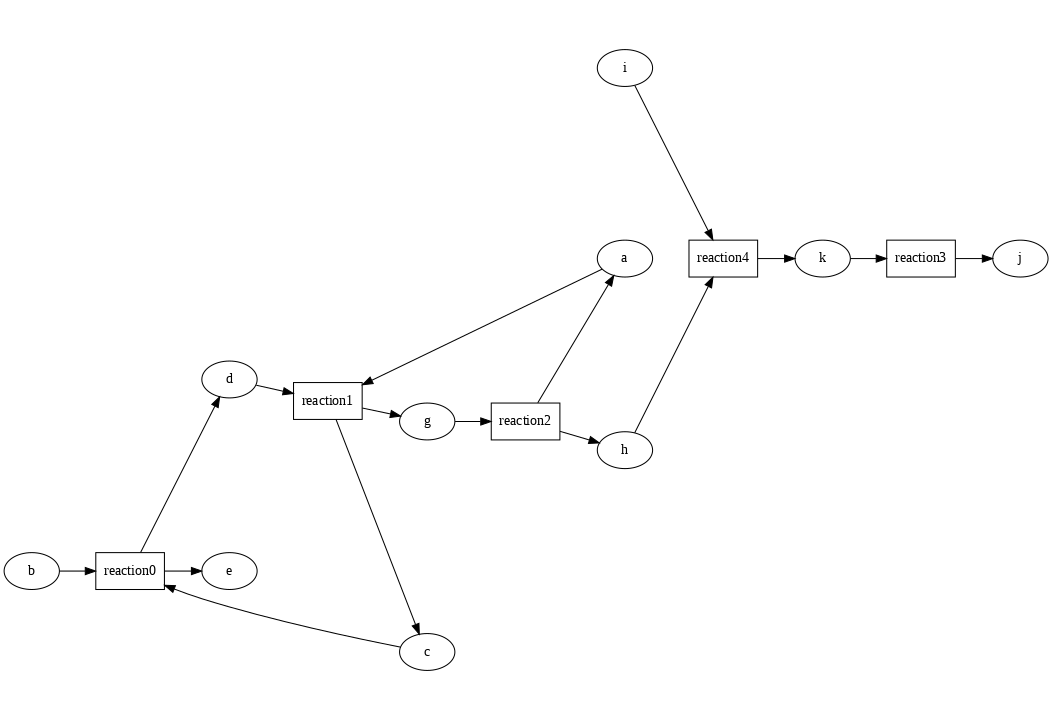

MA(1) for b+c=>d+e.
MA(1) for a+d=>c+g.
MA(1) for g=>a+h.
MA(1) for k=>j.
MA(1) for h+i=>k.

In [14]:
new_model(CRNlong).
b+c=>d+e.
a+d=>c+g.
g=>a+h.
k=>j.
h+i=>k.
export_biocham(CRNlong.bc).
list_model.
draw_reactions.

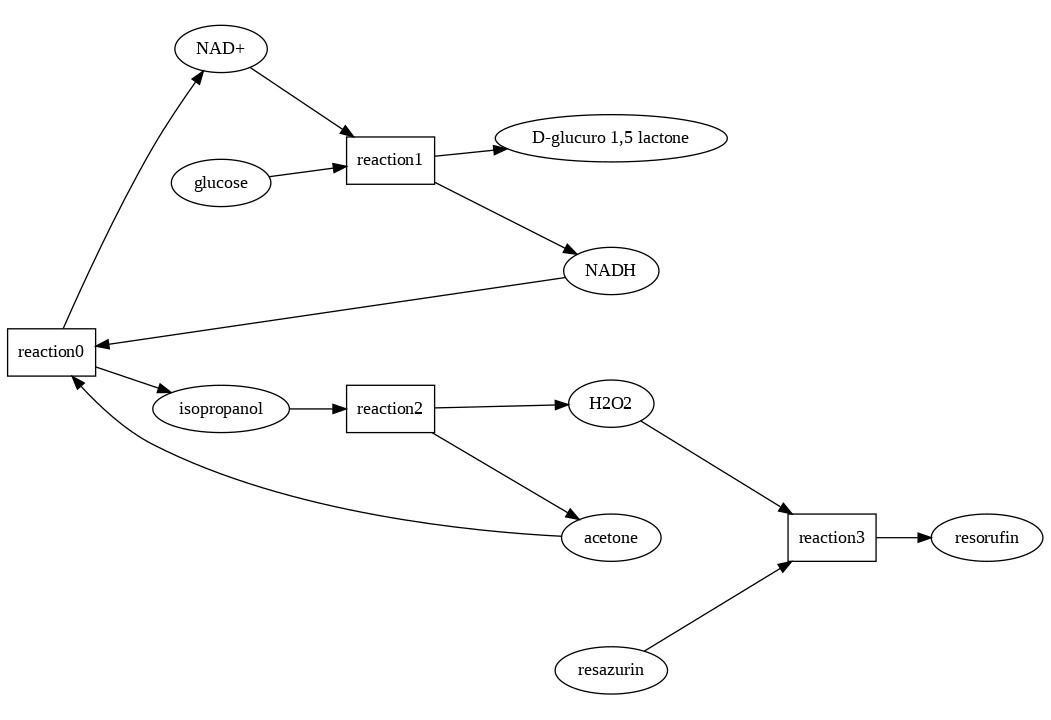

MA(1) for NADH+acetone=>'NAD+'+isopropanol.
MA(1) for 'NAD+'+glucose=>'D-glucuro 1,5 lactone'+NADH.
MA(1) for isopropanol=>H2O2+acetone.
MA(1) for H2O2+resazurin=>resorufin.

In [1]:
new_model(CRNAlexis).
NADH+acetone=>'NAD+'+isopropanol.
'NAD+'+glucose=> 'D-glucuro 1,5 lactone' + NADH.
isopropanol=>H2O2+acetone.
H2O2+resazurin=>resorufin.
export_biocham(CRNAlexis.bc).
list_model.
draw_reactions.

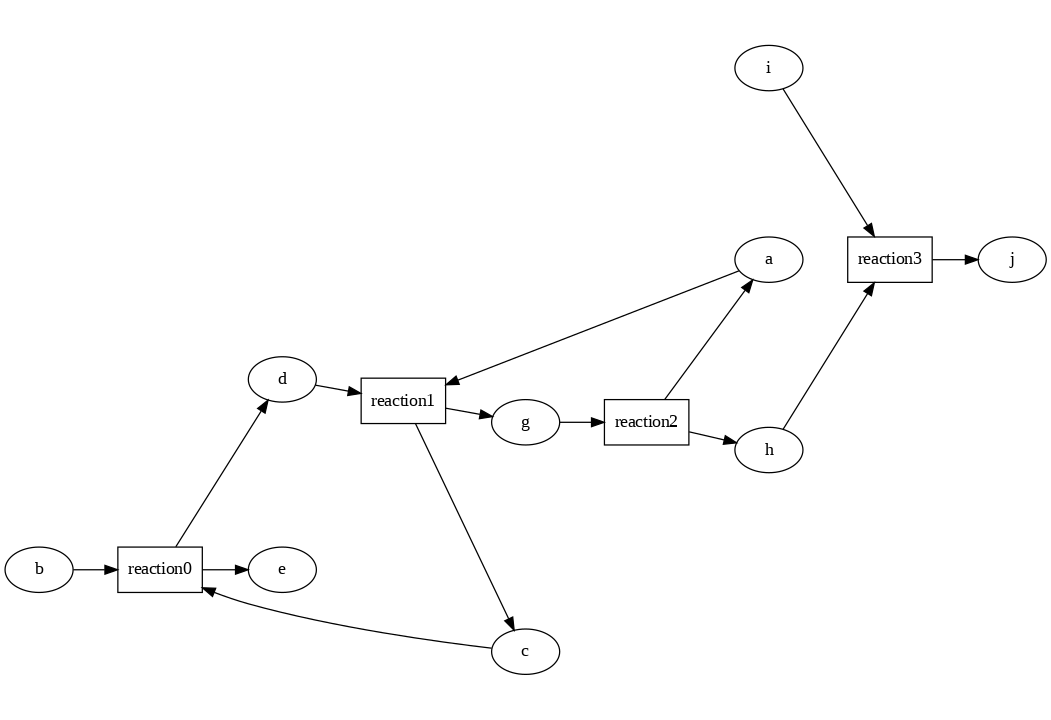

MA(1) for b+c=>d+e.
MA(1) for a+d=>c+g.
MA(1) for g=>a+h.
MA(1) for h+i=>j.

In [2]:
new_model(CRNshort).
b+c => d+e.
a+d => c+g.
g => a+h.
h+i => j.
export_biocham(CRNshort.bc).
list_model.
draw_reactions.

In [55]:
% list_models.

We'll be using the following subset of reactions for the rest of the notebook :

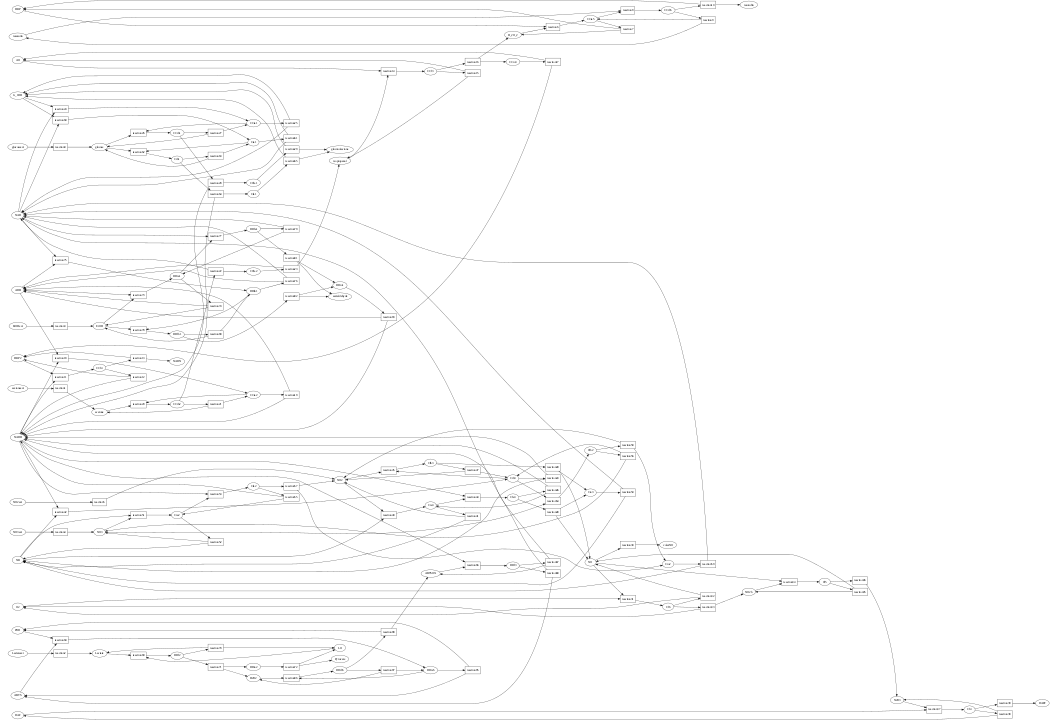

In [3]:
clear_model.
load(library:examples/modalINF473L/catalog.bc).
export_biocham(Catalog.bc).
draw_reactions.

# 2. First SEPI examples on basic CRNs to understand functionnalities

Another example, this time a SEPI with a simple contraction :

In [4]:
search_reduction(CRNlong.bc, CRNAlexis.bc, mapping_restriction : [a->acetone, b->glucose, j->resorufin], merge_restriction : not_species).

sepi
b -> glucose
c -> NAD+
d -> NADH
e -> D-glucuro 1,5 lactone
a -> acetone
g -> isopropanol
h -> H2O2
k -> deleted
j -> resorufin
i -> resazurin
{b+c => d+e} -> {NAD++glucose => D-glucuro 1,5 lactone+NADH}
{a+d => c+g} -> {NADH+acetone => NAD++isopropanol}
{g => a+h} -> {isopropanol => H2O2+acetone}
{k => j} -> {H2O2+resazurin => resorufin}
{h+i => k} -> {H2O2+resazurin => resorufin}
Number of reductions: 1

In the same fashion, we can also see that with the bigger CRNlong :

In [30]:
search_reduction(CRNlong.bc, CRNVeryShort.bc, mapping_restriction : [a->acetone, b->glucose, j->resorufin], merge_restriction : not_species).

sepi
b -> glucose
c -> deleted
d -> deleted
e -> deleted
a -> acetone
g -> deleted
h -> deleted
i -> deleted
k -> deleted
j -> resorufin
{b+c => d+e} -> {acetone+glucose => resorufin}
{a+d => c+g} -> {acetone+glucose => resorufin}
{g => a+h} -> deleted
{h+i => k} -> deleted
{k => j} -> {acetone+glucose => resorufin}
Number of reductions: 1

This cell's goal is to show that Alexis' CRN is indeed a SEPI of the VeryShort, meaning it is a solution to it's concretization

In [5]:
search_reduction(CRNAlexis.bc, CRNVeryShort.bc, mapping_restriction : [acetone->acetone, glucose->glucose, resorufin->resorufin], merge_restriction : not_species).

sepi
NADH -> deleted
acetone -> acetone
NAD+ -> deleted
isopropanol -> deleted
glucose -> glucose
D-glucuro 1,5 lactone -> deleted
H2O2 -> deleted
resazurin -> deleted
resorufin -> resorufin
{NADH+acetone => NAD++isopropanol} -> {acetone+glucose => resorufin}
{NAD++glucose => D-glucuro 1,5 lactone+NADH} -> {acetone+glucose => resorufin}
{isopropanol => H2O2+acetone} -> deleted
{H2O2+resazurin => resorufin} -> {acetone+glucose => resorufin}
Number of reductions: 1

# 3. Implementation of these principles to search real CRNs in the catalog

Below : SEPI search of a concretization isomorphic to Alexis'

In [6]:
search_reduction(Catalog.bc, CRNshort.bc, mapping_restriction : [acetone->a, glucose->b, resorufin->j], merge_restriction : not_species).

sepi
glucoseext -> deleted
glucose -> b
acetoneext -> deleted
acetone -> a
Lactateext -> deleted
Lactate -> e
EtOHext -> deleted
EtOH -> i
NO3ext -> deleted
NO3 -> deleted
NO2ext -> deleted
NO2 -> deleted
HRP -> deleted
H_2O_2 -> deleted
CCia5 -> deleted
resazurin -> deleted
CCib5 -> deleted
resorufin -> j
HRP2 -> deleted
NADH -> deleted
CCf4 -> deleted
NADN -> deleted
AO -> deleted
isopropanol -> deleted
CCf3 -> deleted
CCio3 -> deleted
ADH -> h
CCia2 -> deleted
CCib2 -> deleted
CCfa2 -> deleted
NAD -> deleted
G_1DH -> deleted
CCia1 -> deleted
CCib1 -> deleted
CCfa1 -> deleted
gluconolacrone -> deleted
NO -> deleted
volatNO -> deleted
O2 -> deleted
Cf6 -> deleted
NO2b -> deleted
Cf5 -> deleted
N2O3 -> deleted
DAF -> deleted
Cf4 -> deleted
DAFF -> deleted
NR -> deleted
Cia3 -> deleted
Cib3 -> deleted
Cfa3 -> deleted
Cfb3 -> deleted
Cio3 -> deleted
Cia2 -> deleted
Cfa2 -> deleted
Cfb2 -> deleted
Cio2 -> deleted
Cia1 -> deleted
Cib1 -> deleted
Cfa1 -> deleted
ABTSOX -> g
DDf3 -> deleted


In [7]:
search_reduction(Catalog.bc, CRNshort.bc, mapping_restriction : [acetone->a, glucose->b, resorufin->j], merge_restriction : not_species, show_support : yes).

sepi
glucose
acetone
Lactate
EtOH
resorufin
ADH
ABTSOX
POD
DDib5
NO2ext => NO2
CCia5+resazurin => CCib5
CCib5 => CCia5+resazurin
CCib5 => HRP+resorufin
CCf3 => AO+isopropanol
CCia2+acetone => CCib2
CCib2 => CCia2+acetone
CCia1 => G_1DH+NAD
Cib3+NO2 => Cfb3
Cia1+glucose => Cib1
Cib1 => Cfa1+NADH
ABTSOX+NADH => DDf3
DDf3 => ABTS+NAD
DDf2 => LO+Lactate
ADH+NAD => DDib1
DDib1 => ADH+NAD
DDib1+EtOH => DDfb1
DDfb1 => DDio1+acetaldehyde
ABTS+POD => DDia5
DDia5+H2O2 => DDib5
DDib5 => ABTSOX+POD
Number of reductions: 1

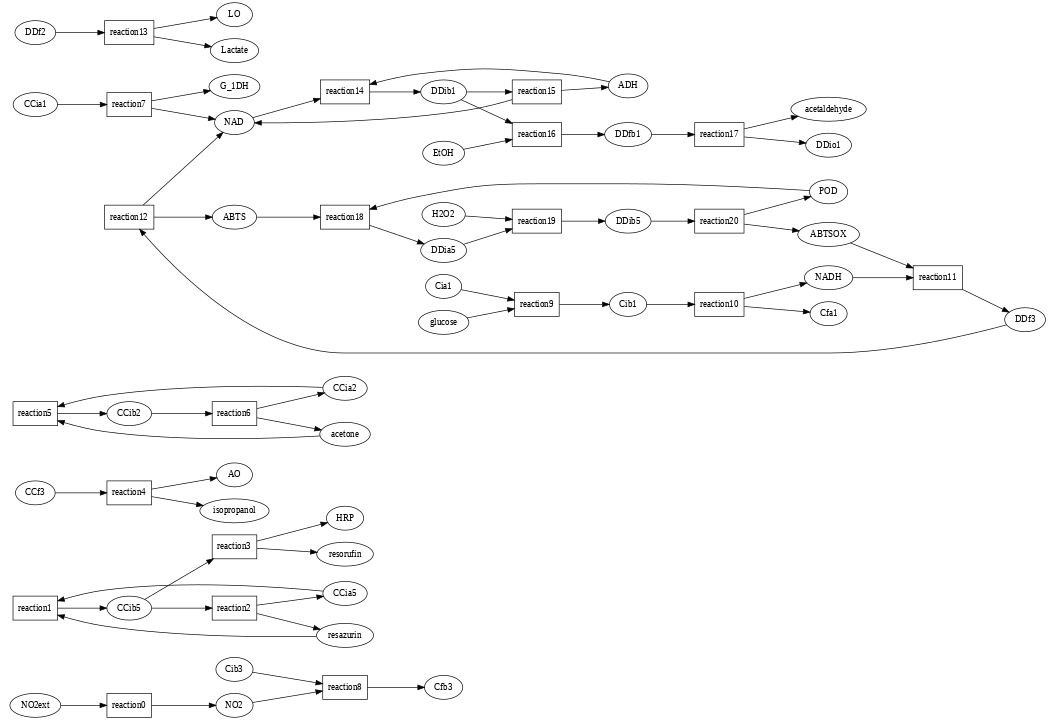

In [8]:
new_model.
NO2ext => NO2.
CCia5+resazurin => CCib5.
CCib5 => CCia5+resazurin.
CCib5 => HRP+resorufin.
CCf3 => AO+isopropanol.
CCia2+acetone => CCib2.
CCib2 => CCia2+acetone.
CCia1 => G_1DH+NAD.
Cib3+NO2 => Cfb3.
Cia1+glucose => Cib1.
Cib1 => Cfa1+NADH.
ABTSOX+NADH => DDf3.
DDf3 => ABTS+NAD.
DDf2 => LO+Lactate.
ADH+NAD => DDib1.
DDib1 => ADH+NAD.
DDib1+EtOH => DDfb1.
DDfb1 => DDio1+acetaldehyde.
ABTS+POD => DDia5.
DDia5+H2O2 => DDib5.
DDib5 => ABTSOX+POD.
draw_reactions.

Same search but with an additional step before resorufin (analoguous to the solutions found with the SISO* heuristic algorithms).

In [9]:
search_reduction(Catalog.bc, CRNlong.bc, mapping_restriction : [acetone->a, glucose->b, resorufin->j], merge_restriction : not_species).

sepi
glucoseext -> deleted
glucose -> b
acetoneext -> deleted
acetone -> a
Lactateext -> deleted
Lactate -> deleted
EtOHext -> deleted
EtOH -> i
NO3ext -> deleted
NO3 -> deleted
NO2ext -> deleted
NO2 -> deleted
HRP -> deleted
H_2O_2 -> h
CCia5 -> deleted
resazurin -> deleted
CCib5 -> deleted
resorufin -> j
HRP2 -> deleted
NADH -> k
CCf4 -> deleted
NADN -> deleted
AO -> deleted
isopropanol -> deleted
CCf3 -> deleted
CCio3 -> deleted
ADH -> deleted
CCia2 -> deleted
CCib2 -> deleted
CCfa2 -> deleted
NAD -> deleted
G_1DH -> deleted
CCia1 -> g
CCib1 -> deleted
CCfa1 -> deleted
gluconolacrone -> deleted
NO -> c
volatNO -> deleted
O2 -> deleted
Cf6 -> deleted
NO2b -> deleted
Cf5 -> deleted
N2O3 -> deleted
DAF -> deleted
Cf4 -> deleted
DAFF -> deleted
NR -> deleted
Cia3 -> deleted
Cib3 -> deleted
Cfa3 -> deleted
Cfb3 -> deleted
Cio3 -> deleted
Cia2 -> deleted
Cfa2 -> deleted
Cfb2 -> deleted
Cio2 -> deleted
Cia1 -> deleted
Cib1 -> deleted
Cfa1 -> deleted
ABTSOX -> e
DDf3 -> deleted
ABTS -> dele

SEPI search to find a regular solution to the acetone$\wedge$ glucose $=$ resorufin CRN

In [10]:
search_reduction(Catalog.bc, CRNVeryShort.bc, mapping_restriction : [acetone->acetone, glucose->glucose, resorufin->resorufin], merge_restriction : not_species).

sepi
glucoseext -> deleted
glucose -> glucose
acetoneext -> deleted
acetone -> acetone
Lactateext -> deleted
Lactate -> deleted
EtOHext -> deleted
EtOH -> deleted
NO3ext -> deleted
NO3 -> deleted
NO2ext -> deleted
NO2 -> deleted
HRP -> deleted
H_2O_2 -> deleted
CCia5 -> deleted
resazurin -> deleted
CCib5 -> deleted
resorufin -> resorufin
HRP2 -> deleted
NADH -> deleted
CCf4 -> deleted
NADN -> deleted
AO -> deleted
isopropanol -> deleted
CCf3 -> deleted
CCio3 -> deleted
ADH -> deleted
CCia2 -> deleted
CCib2 -> deleted
CCfa2 -> deleted
NAD -> deleted
G_1DH -> deleted
CCia1 -> deleted
CCib1 -> deleted
CCfa1 -> deleted
gluconolacrone -> deleted
NO -> deleted
volatNO -> deleted
O2 -> deleted
Cf6 -> deleted
NO2b -> deleted
Cf5 -> deleted
N2O3 -> deleted
DAF -> deleted
Cf4 -> deleted
DAFF -> deleted
NR -> deleted
Cia3 -> deleted
Cib3 -> deleted
Cfa3 -> deleted
Cfb3 -> deleted
Cio3 -> deleted
Cia2 -> deleted
Cfa2 -> deleted
Cfb2 -> deleted
Cio2 -> deleted
Cia1 -> deleted
Cib1 -> deleted
Cfa1 -

In [11]:
search_reduction(Catalog.bc, CRNVeryShort.bc, mapping_restriction : [acetone->acetone, glucose->glucose, resorufin->resorufin], merge_restriction : not_species, show_support : yes).

sepi
glucose
acetone
resorufin
CCib5 => HRP+resorufin
CCia2+acetone => CCib2
CCia1+glucose => CCib1
Cia1+glucose => Cib1
Number of reductions: 1

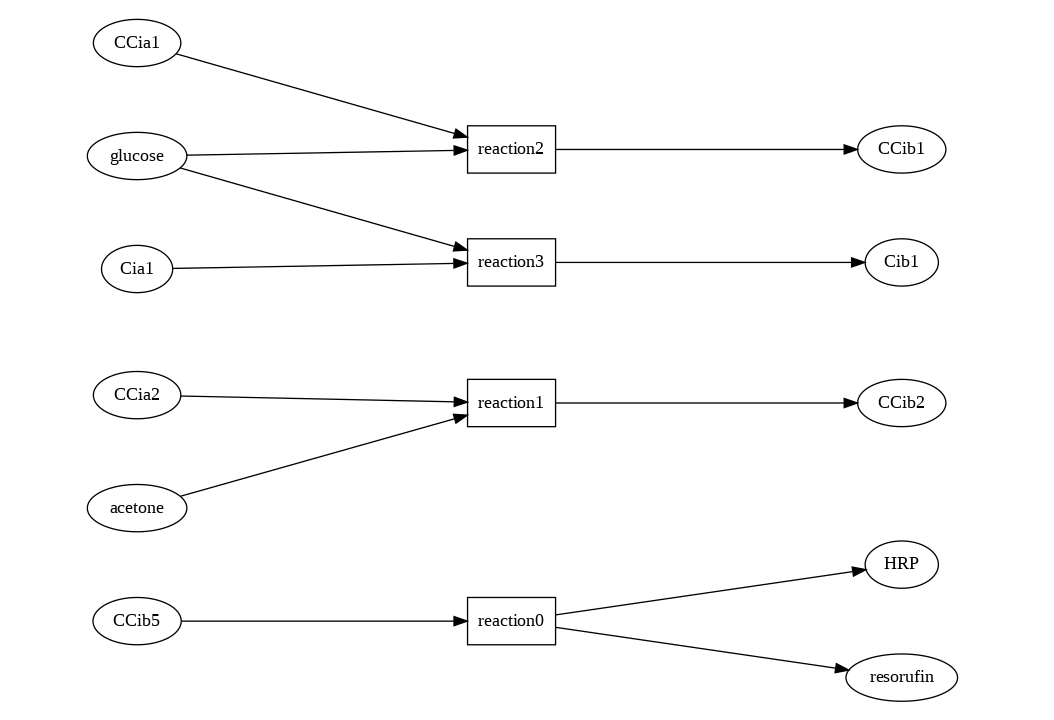

In [12]:
new_model.
CCib5 => HRP+resorufin.
CCia2+acetone => CCib2.
CCia1+glucose => CCib1.
Cia1+glucose => Cib1.
draw_reactions.

AVOID USING, former usage but network is too large <br>
Smart1Subset is made out of every reaction with an enzyme involved in the first solution heuristically found, and at least one metabolite in it


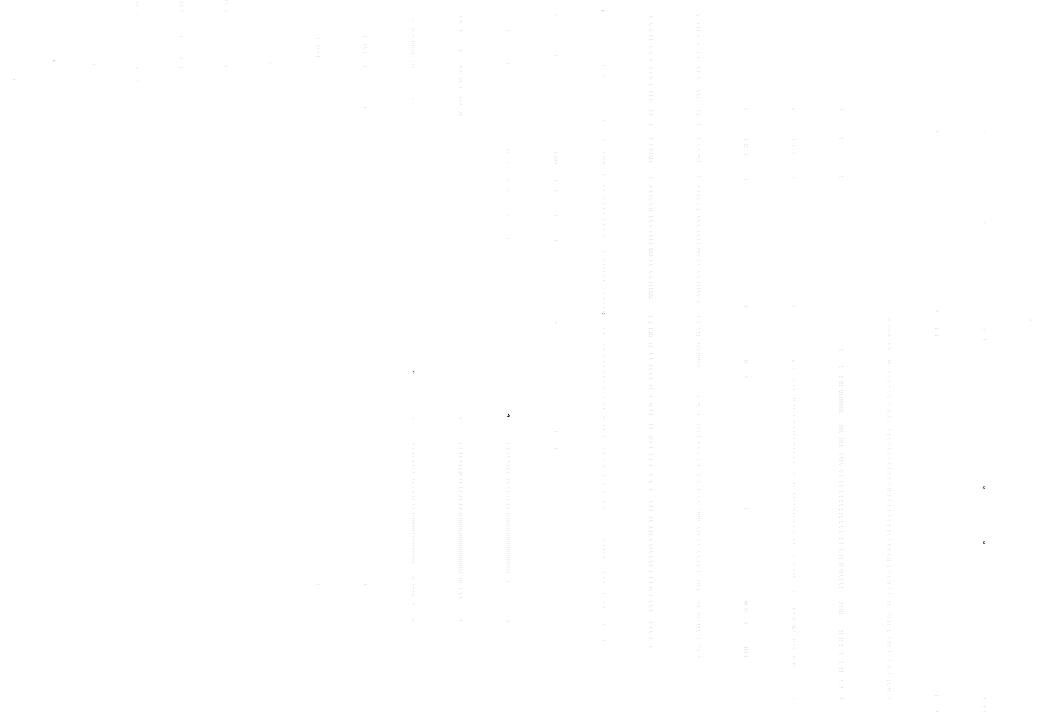

In [32]:
clear_model.
load(library:examples/sepi/BrendaBiochamReactionsSmart1SubsetM.bc).
draw_reactions.

In [ ]:
search_reduction(library:examples/sepi/BrendaBiochamReactionsSmart1SubsetM.bc, CRNlong.bc, timeout : 1000000000000000000000000, stats : yes, merge_restriction : not_species, mapping_restriction : [m286->a, m33->b, m25014->j]).

# 4. Bigger examples of concretization : GluONe, LacOH and GluNOx

<img src="doctor_in_the_cell/circuit.png" alt="circuit.png" style="width: 800px;"/>

These three logical circuits can be read as : <br>
<br>
GluONe $\rightarrow$ Resorufin = glucose$\wedge$acetone et NADH = glucose $\wedge$(1-acetone) <br>
LacOH  $\rightarrow$ NADH = EtOH et ABTSOX = Lactate$\wedge$(1-EtOH) <br>
GluNOx $\rightarrow$ DAFF = glucose$\wedge$NOx et NADH = glucose$\wedge$(1-NOx)
<br><br>
We will mostly focus on the none NADH branches.

## GluONe

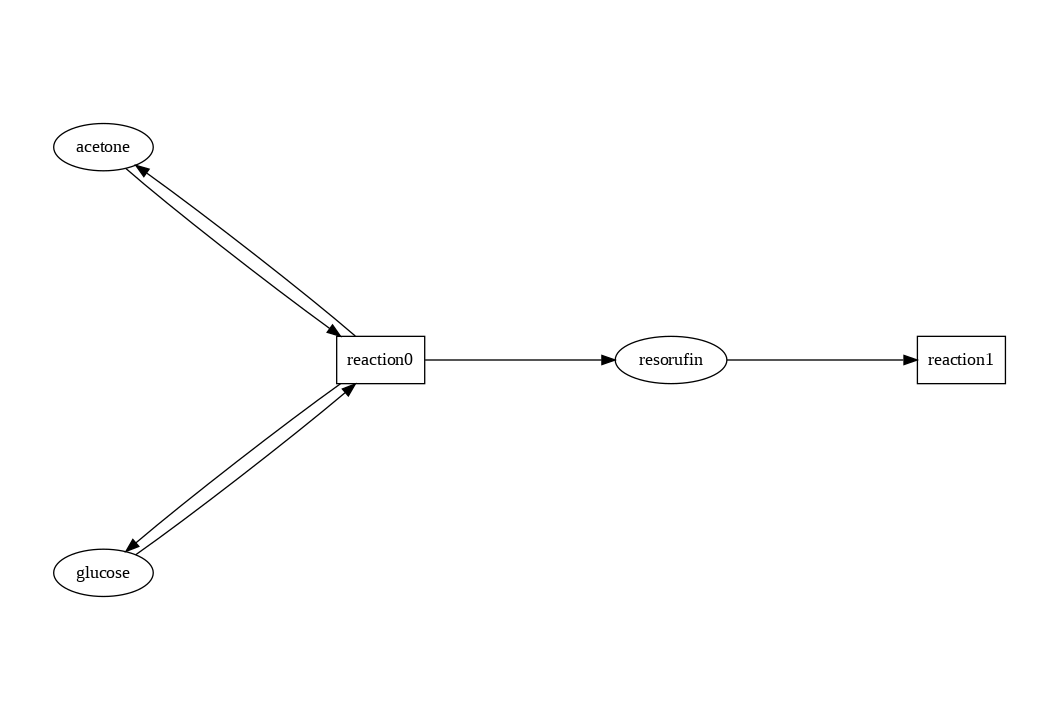

MA(1.0) for acetone+glucose=>acetone+glucose+resorufin.
MA(1.0) for resorufin=>_.
initial_state(acetone=1).
initial_state(glucose=1).

In [23]:
clear_model.
%add_function( resorufin = (acetone * glucose), NADH = (glucose * (1 - acetone))).
stabilize_expression(acetone*glucose-resorufin,resorufin,[acetone=1,glucose=1]).
%stabilize_expression(ABTSOX-lactate*(1-EtOH),ABTSOX,[lactate=1,EtOH=0,ABTSOX=1]).
export_biocham(GluONe.bc).
list_model.
draw_reactions.

A simplified aCRN without the resorufin$\rightarrow$_ , as it leads to some issues :

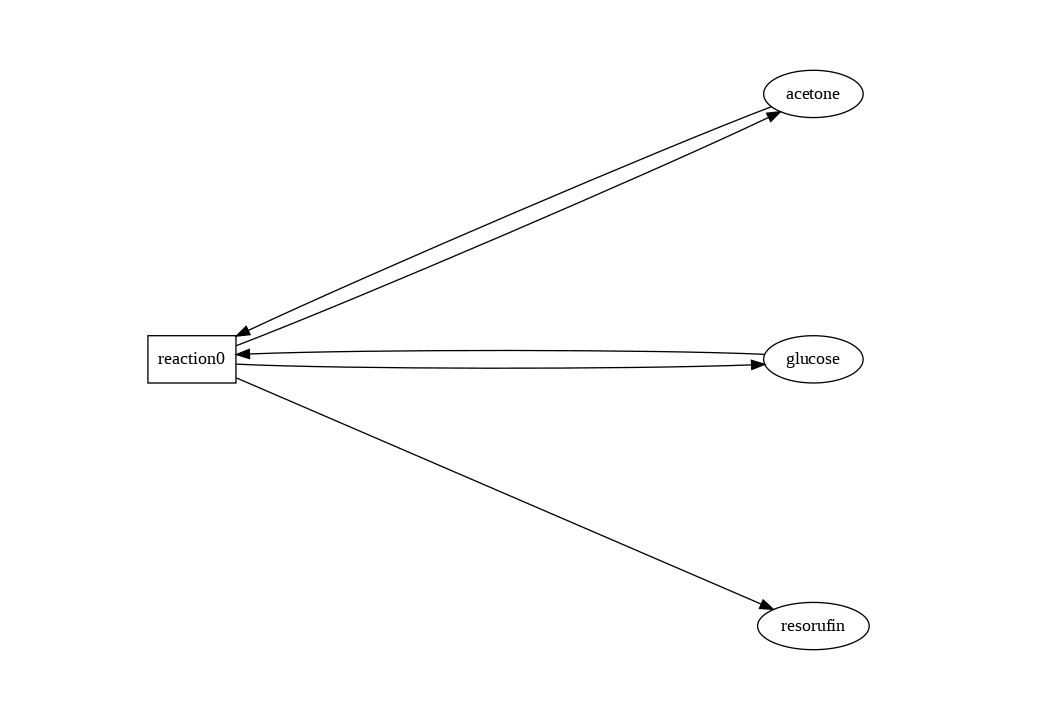

In [22]:
new_model(GluONe_Simple).
acetone+glucose=>acetone+glucose+resorufin.
export_biocham(GluONe_Simple.bc).
draw_reactions.

In [24]:
search_reduction(Catalog.bc, GluONe_Simple.bc, mapping_restriction : [acetone->acetone, glucose->glucose, resorufin->resorufin], merge_restriction : not_species).

sepi
glucoseext -> deleted
glucose -> glucose
acetoneext -> deleted
acetone -> acetone
Lactateext -> deleted
Lactate -> deleted
EtOHext -> deleted
EtOH -> deleted
NO3ext -> deleted
NO3 -> deleted
NO2ext -> deleted
NO2 -> deleted
HRP -> deleted
H_2O_2 -> deleted
CCia5 -> deleted
resazurin -> deleted
CCib5 -> deleted
resorufin -> resorufin
HRP2 -> deleted
NADH -> deleted
CCf4 -> deleted
NADN -> deleted
AO -> deleted
isopropanol -> deleted
CCf3 -> deleted
CCio3 -> deleted
ADH -> deleted
CCia2 -> deleted
CCib2 -> deleted
CCfa2 -> deleted
NAD -> deleted
G_1DH -> deleted
CCia1 -> deleted
CCib1 -> deleted
CCfa1 -> deleted
gluconolacrone -> deleted
NO -> deleted
volatNO -> deleted
O2 -> deleted
Cf6 -> deleted
NO2b -> deleted
Cf5 -> deleted
N2O3 -> deleted
DAF -> deleted
Cf4 -> deleted
DAFF -> deleted
NR -> deleted
Cia3 -> deleted
Cib3 -> deleted
Cfa3 -> deleted
Cfb3 -> deleted
Cio3 -> deleted
Cia2 -> deleted
Cfa2 -> deleted
Cfb2 -> deleted
Cio2 -> deleted
Cia1 -> deleted
Cib1 -> deleted
Cfa1 -

## LacOH

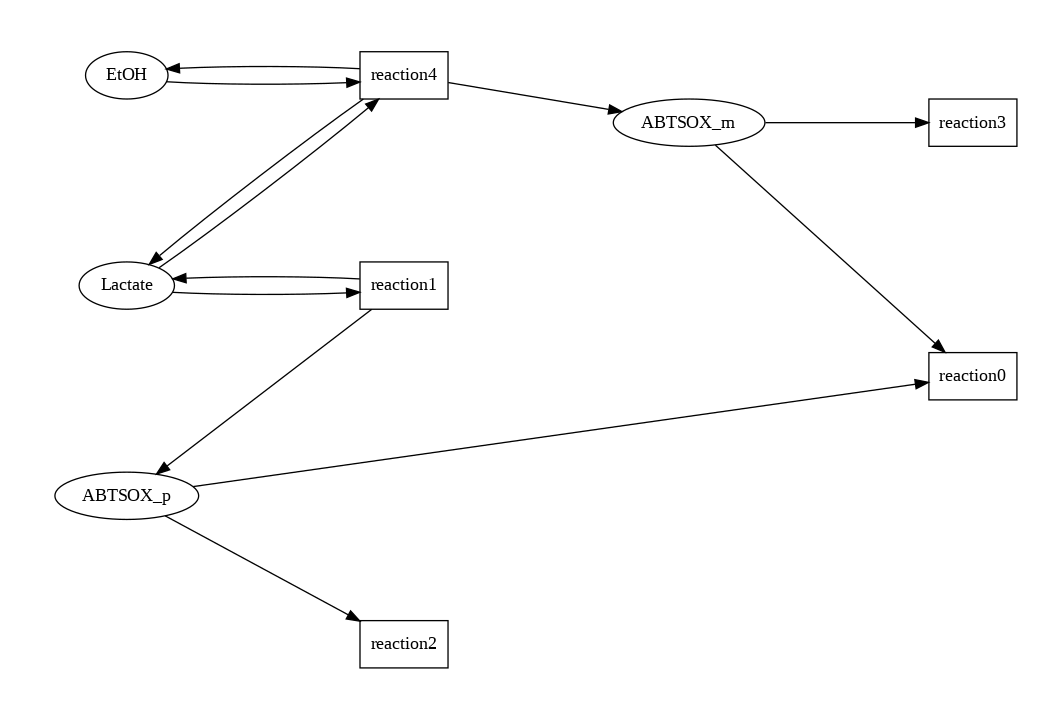

MA(fast) for ABTSOX_m+ABTSOX_p=>_.
MA(1.0) for Lactate=>ABTSOX_p+Lactate.
MA(1.0) for ABTSOX_p=>_.
MA(1.0) for ABTSOX_m=>_.
MA(1.0) for EtOH+Lactate=>ABTSOX_m+EtOH+Lactate.
initial_state(ABTSOX_p=1).
initial_state(Lactate=1).
initial_state(EtOH=1).
parameter(
  fast = 1000
).

In [15]:
clear_model.
%add_function(NADH = EtOH, ABTSOX = (1-EtOH)*Lactate).
%compile_function(NADH = EtOH, ABTSOX = (1-EtOH)*Lactate).
%stabilize_expression(NADH - EtOH, (1 - EtOH) * Lactate - ABTSOX, [NADH=1, EtOH=1, ABTSOX=1, Lactate=1]).
%stabilize_expression(NADH - EtOH, NADH, [NADH=1,EtOH=1,Lactate=1]).
stabilize_expression(Lactate*(1-EtOH)-ABTSOX, ABTSOX, [Lactate=1, EtOH=1, ABTSOX=1]).
export_biocham(LacOH.bc).
list_model.
draw_reactions.

In [16]:
search_reduction(Catalog.bc, LacOH.bc, mapping_restriction : [Lactate->Lactate, EtOH->EtOH, ABTSOX->ABTSOX_p], merge_restriction : not_species).

no sepi found
Number of reductions: 0

## GluNOx

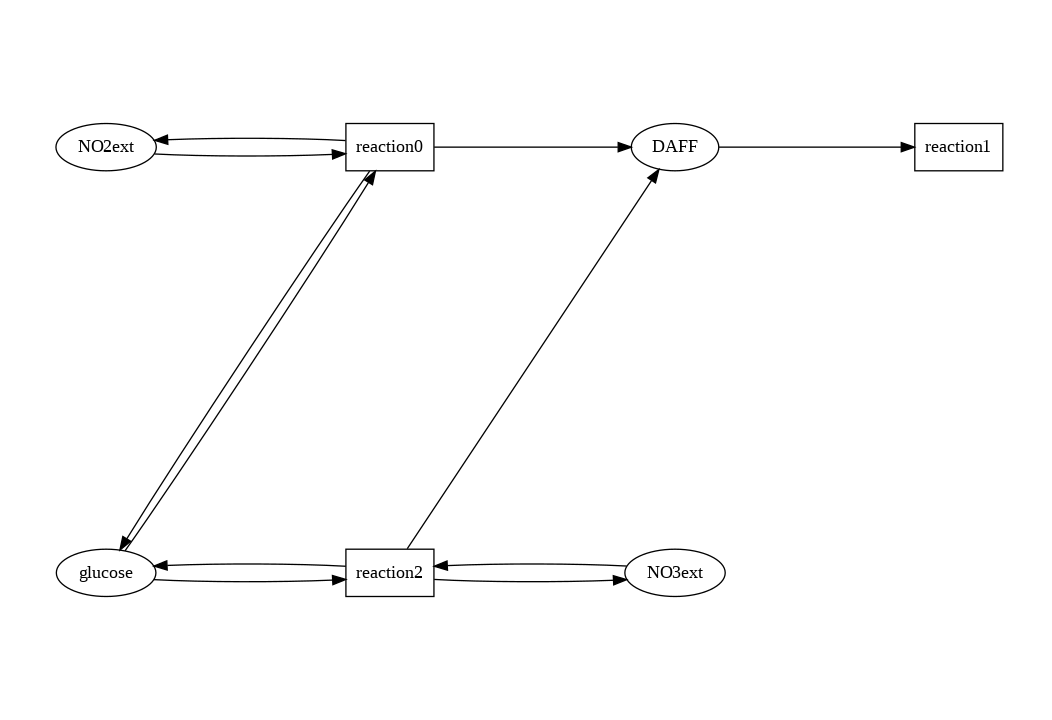

MA(1.0) for NO2ext+glucose=>DAFF+NO2ext+glucose.
MA(1.0) for DAFF=>_.
MA(1.0) for NO3ext+glucose=>DAFF+NO3ext+glucose.
initial_state(glucose=1).
initial_state(NO2ext=1).

In [29]:
clear_model.
%add_function( NADH = glucose*(1-NOx), DAFF = glucose*NOx).
stabilize_expression(DAFF-glucose*(NO2ext+NO3ext),DAFF,[glucose=1,NO2ext=1,NO3ext=0]).
export_biocham(GluNOx.bc).
list_model.
draw_reactions.

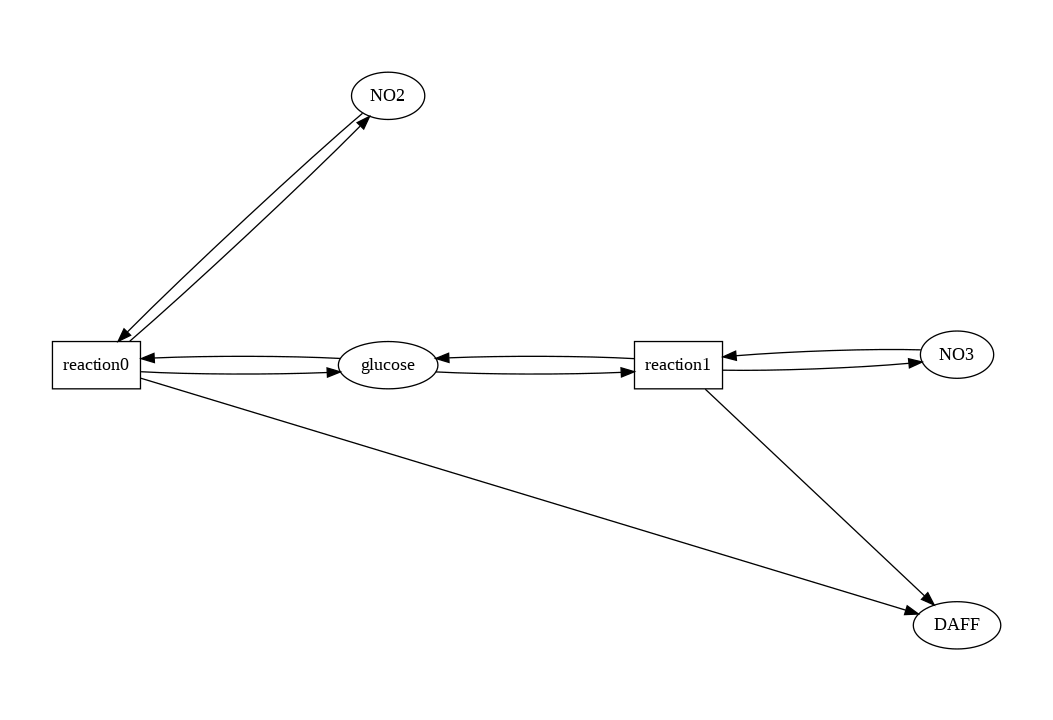

In [30]:
clear_model.
NO2+glucose=>DAFF+NO2+glucose.
NO3+glucose=>DAFF+NO3+glucose.
export_biocham(GluNOx_Simple.bc).
draw_reactions.

In [33]:
search_reduction(Catalog.bc, GluNOx_Simple.bc, mapping_restriction : [NO2->NO2,NO3->NO3, glucose->glucose, DAFF->DAFF], merge_restriction : not_species).

no sepi found
Number of reductions: 0

In [ ]:
search_reduction(Catalog.bc, GluNOx.bc, mapping_restriction : [NO->NO,NO2->NO2, glucose->glucose, DAFF->DAFF], merge_restriction : not_species).

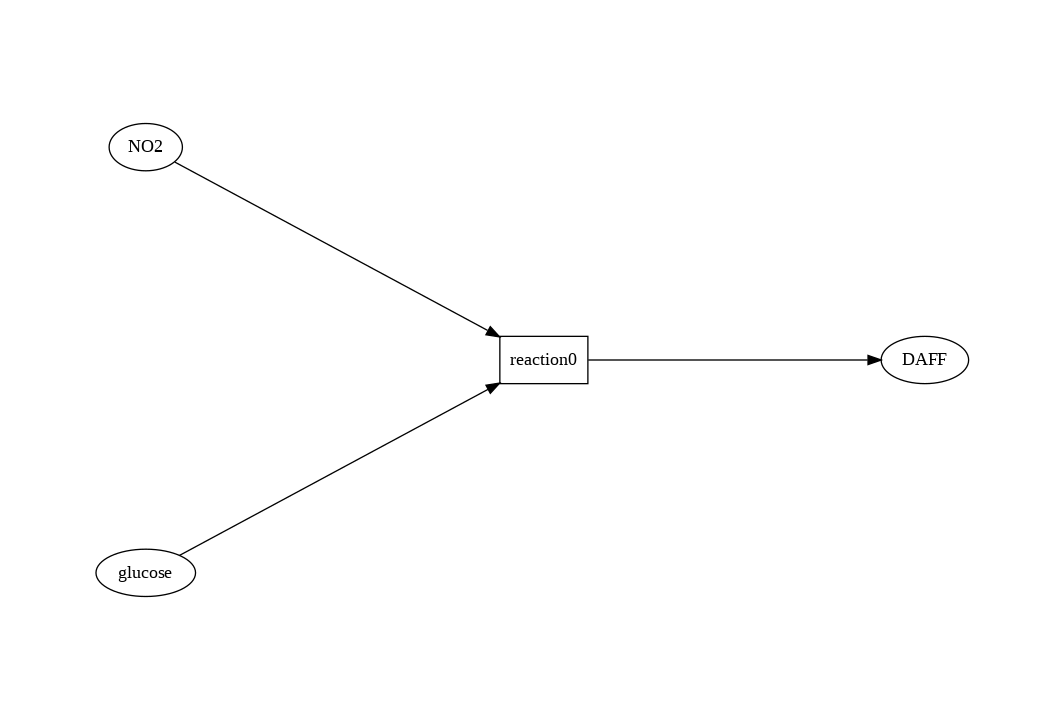

In [46]:
clear_model.
NO2 + glucose => DAFF.
%NO + glucose => DAFF.
%NO2 + glucose => DAFF + NO2 + glucose.
%DAFF=>_.
%NO3 + glucose => DAFF + NO3 + glucose.
export_biocham(CRNVeryShort2.bc).
draw_reactions.

In [48]:
search_reduction(Catalog.bc, CRNVeryShort2.bc, mapping_restriction : [NO2->NO2, glucose->glucose, DAFF->DAFF], merge_restriction : not_species).

sepi
glucoseext -> deleted
glucose -> glucose
acetoneext -> deleted
acetone -> deleted
Lactateext -> deleted
Lactate -> deleted
EtOHext -> deleted
EtOH -> deleted
NO3ext -> deleted
NO3 -> deleted
NO2ext -> deleted
NO2 -> NO2
HRP -> deleted
H_2O_2 -> deleted
CCia5 -> deleted
resazurin -> deleted
CCib5 -> deleted
resorufin -> deleted
HRP2 -> deleted
NADH -> deleted
CCf4 -> deleted
NADN -> deleted
AO -> deleted
isopropanol -> deleted
CCf3 -> deleted
CCio3 -> deleted
ADH -> deleted
CCia2 -> deleted
CCib2 -> deleted
CCfa2 -> deleted
NAD -> deleted
G_1DH -> deleted
CCia1 -> deleted
CCib1 -> deleted
CCfa1 -> deleted
gluconolacrone -> deleted
NO -> deleted
volatNO -> deleted
O2 -> deleted
Cf6 -> deleted
NO2b -> deleted
Cf5 -> deleted
N2O3 -> deleted
DAF -> deleted
Cf4 -> deleted
DAFF -> DAFF
NR -> deleted
Cia3 -> deleted
Cib3 -> deleted
Cfa3 -> deleted
Cfb3 -> deleted
Cio3 -> deleted
Cia2 -> deleted
Cfa2 -> deleted
Cfb2 -> deleted
Cio2 -> deleted
Cia1 -> deleted
Cib1 -> deleted
Cfa1 -> deleted

# 5. SISO Solutions

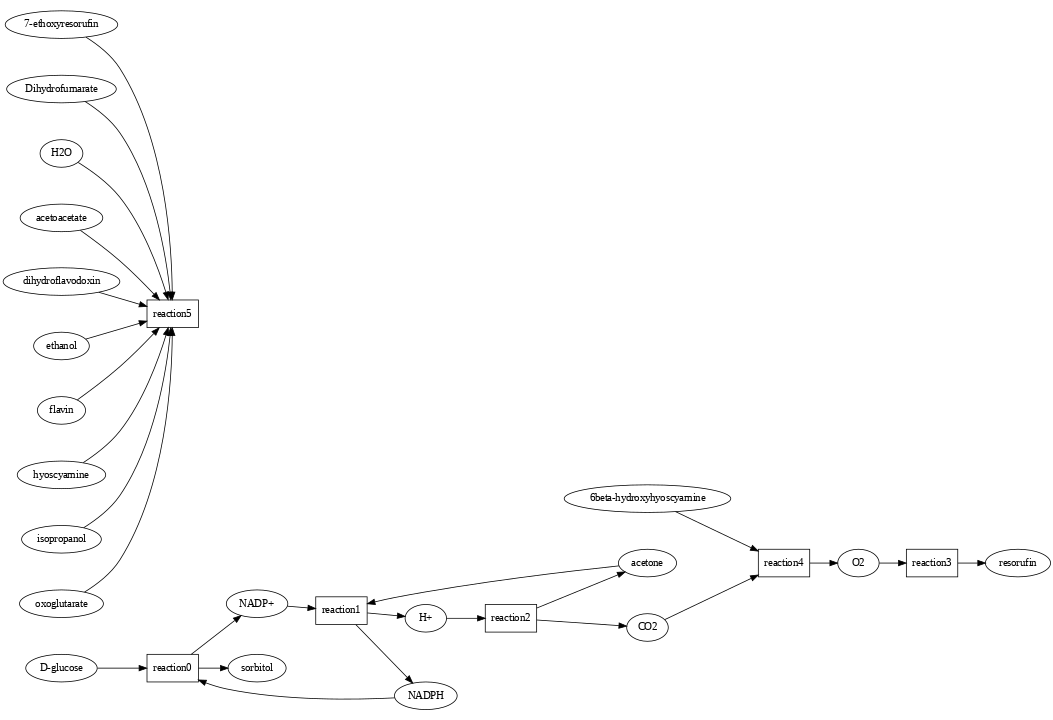

MA(1) for 'D-glucose'+NADPH=>'NADP+'+sorbitol.
MA(1) for 'NADP+'+acetone=>'H+'+NADPH.
MA(1) for 'H+'=>CO2+acetone.
MA(1) for O2=>resorufin.
MA(1) for '6beta-hydroxyhyoscyamine'+CO2=>O2.
MA(1) for '7-ethoxyresorufin'+Dihydrofumarate+H2O+acetoacetate+dihydroflavodoxin+ethanol+flavin+hyoscyamine+isopropanol+oxoglutarate=>_.

In [13]:
new_model(CRNlong).
'D-glucose'+'NADPH'=>'NADP+'+'sorbitol'. %aldose reductase
'acetone'+'NADP+'=>'NADPH'+'H+'. %alcohol dehydrogenase (NADP+)
'H+'=>'acetone'+'CO2'. %2-oxopropyl-CoM reductase (carboxylating)
'O2'=>'resorufin'. %unspecific monooxygenase
'CO2'+'6beta-hydroxyhyoscyamine'=>'O2'. %hyoscyamine (6S)-dioxygenase
'dihydroflavodoxin'+'7-ethoxyresorufin'+'H2O'+'ethanol'+'flavin'+'acetoacetate'+'Dihydrofumarate'+'hyoscyamine'+'oxoglutarate'+'isopropanol' => _. %espèces envirronantes

export_biocham(CRNlong.bc).
list_model.
draw_reactions.

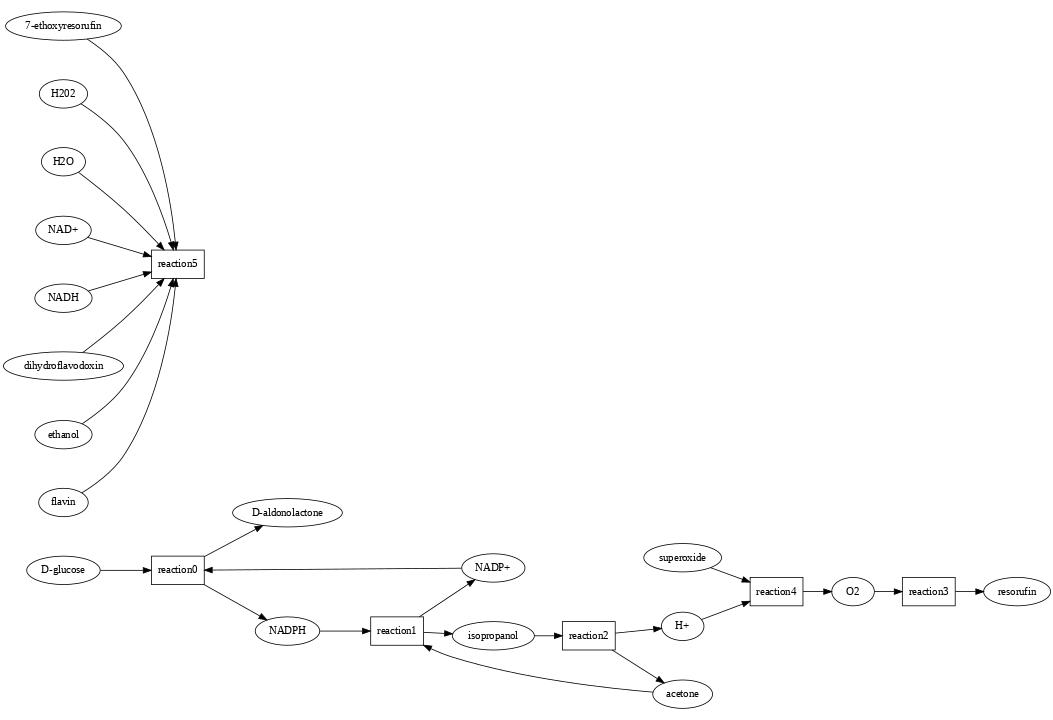

MA(1) for 'D-glucose'+'NADP+'=>'D-aldonolactone'+NADPH.
MA(1) for NADPH+acetone=>'NADP+'+isopropanol.
MA(1) for isopropanol=>'H+'+acetone.
MA(1) for O2=>resorufin.
MA(1) for 'H+'+superoxide=>O2.
MA(1) for '7-ethoxyresorufin'+H202+H2O+'NAD+'+NADH+dihydroflavodoxin+ethanol+flavin=>_.

In [16]:
new_model(CRNlong).
'D-glucose'+'NADP+'=>'NADPH'+'D-aldonolactone'.
'acetone'+'NADPH'=>'NADP+'+'isopropanol'.
'isopropanol'=>'acetone'+'H+'.
'O2'=>'resorufin'.
'H+'+'superoxide'=>'O2'.
'dihydroflavodoxin'+'7-ethoxyresorufin'+'H2O'+'ethanol'+'flavin'+'NAD+'+'NADH'+'H202' => _.
export_biocham(CRNlong.bc).
list_model.
draw_reactions.